<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/0_Machine_Learning_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numpy library 실습**
numpy는 다차원 배열 객체 등 을 구현하기 편하도록 만들어진 python 라이브러리이다.

ndarray 객체에 다차원 배열을 저장한다.

In [5]:
import numpy as np

a = np.array([12, 8, 20, 17, 15])
print(a)

[12  8 20 17 15]


In [6]:
a.sort() # a 정렬
print(a)

[ 8 12 15 17 20]


In [7]:
b = np.array([[12, 3, 4.0], [1,6,5]])
print(b)

b.ndim # b가 몇 차원 구조의 배열인지
b.shape # b의 모양
b.dtype # b의 데이터형

[[12.  3.  4.]
 [ 1.  6.  5.]]


dtype('float64')

In [8]:
c = np.zeros([2,3]) # 영행렬 생성
print(c)

[[0. 0. 0.]
 [0. 0. 0.]]


In [9]:
d = np.random.random([2,5,3]) # 난수 행렬 생성
print(d)

[[[0.35392078 0.43649592 0.02093028]
  [0.82486753 0.42877831 0.82055134]
  [0.52541077 0.19529386 0.7519355 ]
  [0.49244368 0.08916829 0.96638152]
  [0.92619903 0.1227537  0.66223694]]

 [[0.78079727 0.15495249 0.62721295]
  [0.63340756 0.94091146 0.13646052]
  [0.09965204 0.94519803 0.3490021 ]
  [0.12910407 0.33497694 0.02234532]
  [0.6240455  0.0088443  0.88861456]]]


In [11]:
e = np.arange(1, 20, 2.5) # 1부터 20 미만까지 2.5씩 증가시키면서 등간격으로 배열 생성
print(e)

[ 1.   3.5  6.   8.5 11.  13.5 16.  18.5]


# **Matplotlib 실습**
matplotlib은 데이터를 시각화하는데 필요한 라이브러리

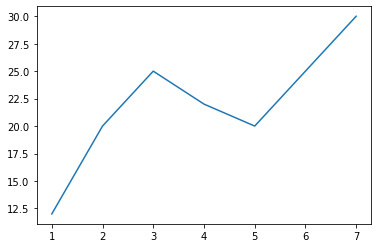

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
y = [12, 20, 25, 22, 20, 25, 30]

plt.plot(x,y) # 꺾은선 그래프

<BarContainer object of 7 artists>

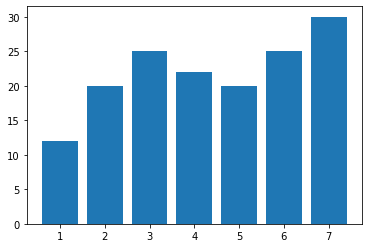

In [2]:
plt.bar(x,y) # 막대그래프

<BarContainer object of 7 artists>

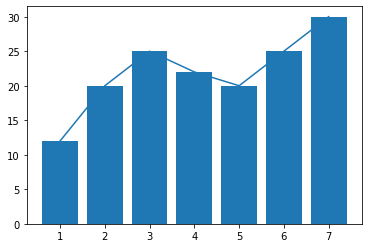

In [3]:
plt.plot(x,y)
plt.bar(x,y) # 두 함수를 한꺼번에 실행하면 같은 그림에 표시

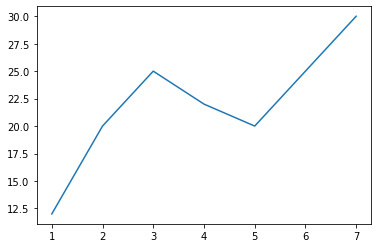

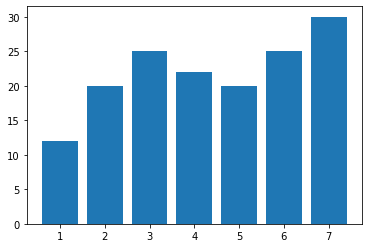

In [4]:
plt.plot(x,y)
plt.show()
plt.bar(x,y)
plt.show() # show() 함수를 이용하면 따로따로 그래프가 나옴

# **Scikit Learn Library 실습**

# Iris dataset와 scikit learn library를 이용한 머신러닝 기초

#### **Iris dataset의 구조**
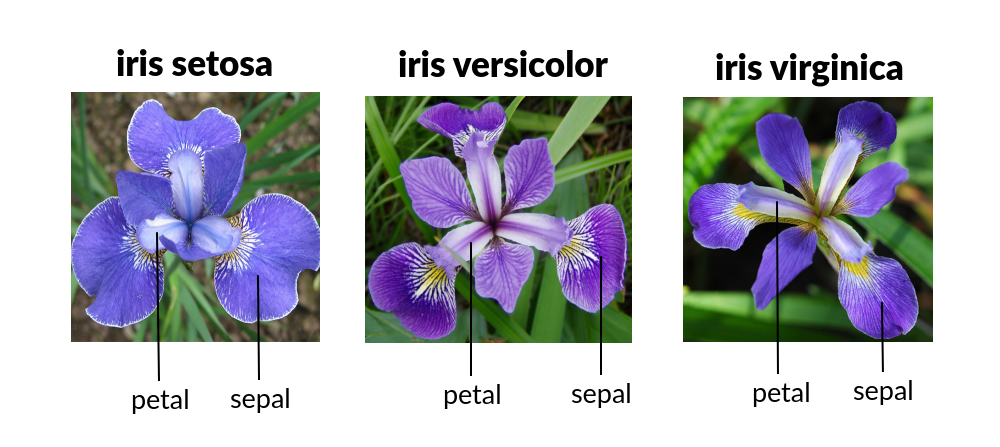

#### scikit-learn이 제공하는 dataset인 iris dataset과 machine learning 기법을 활용해서 iris dataset을 분석하고 예측해보기

plt.scatter 참조 링크 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plotly express 3d scatter 참조 링크 https://plotly.com/python/3d-scatter-plots/

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris() # iris dataset을 읽고
print(iris.DESCR) # dataset 내용을 출력
print(iris.feature_names)

# data frame으로 바꾸어 이용지 좀더 쉽도록
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
print(df)

# class별로 데이터를 분할하기.
setosa = df[df['species'] =='setosa']
versicolor = df[df['species'] =='versicolor']
virginica = df[df['species'] =='virginica']


# class 별로 마킹을 다르게 하기.
setosa_sc = plt.scatter(setosa['sepal length (cm)'],setosa['sepal width (cm)'], marker='o', color='b')
versicolor_sc = plt.scatter(versicolor['sepal length (cm)'],versicolor['sepal width (cm)'], marker='x', color='g')
virginica_sc = plt.scatter(virginica['sepal length (cm)'],virginica['sepal width (cm)'], marker='v', color='k')


# 2차원으로 iris dataset 그래프 그리기
plt.legend((setosa_sc,versicolor_sc,virginica_sc), ('setosa','versicolor','virginica'),loc='upper left') # 범례 왼쪽 위로 두기
plt.title("Iris dataset", fontsize= 20) # title 달기
plt.show()

# 3차원으로 iris dataset 그래프 그리기
import plotly.express as px

fig = px.scatter_3d(df, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)", size="sepal width (cm)", 
              color="species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})
fig.show()

In [ ]:
# target: setosa는 0, versicolor는 1, virginica는 2
for i in range(0, len(iris.data)): # for 반복문을 활용해서 샘플을 순서대로 출력
  print(i+1, iris.data[i], iris.target[i])

### **machine learning 적용하기**

SVM support vector machine 마진이 최대화된 결정 경계를 찾아 분류하는 방법

(마진: 클래스를 구분하는 결정 경계와 이 평면에 가장 가까운 학습 샘플 사이의 거리)

##### 이미지 출처: http://bytepawn.com/svm-with-pytorch.html
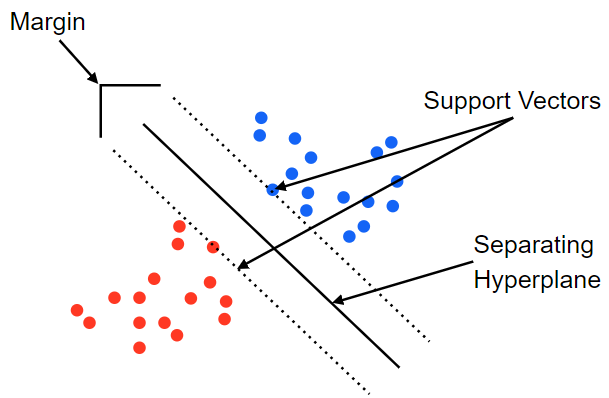

In [ ]:
# SVM 적용
from sklearn import svm

s = svm.SVC(gamma=0.1, C=10)
s.fit(iris.data, iris.target)

print(iris.data[100], iris.target[100]); print(iris.data[50], iris.target[50])
new = [[6.4, 3.2, 6.0, 2.5], [7.1, 3.1, 4.7, 1.35]] # 위 두 데이터(101번째, 51번째 iris 데이터) 변형해서 만든 새로운 데이터
print(new)

pred = s.predict(new) # 새로운 데이터 어떤 붓꽃 종인지 target 예측
print("새로운 2개 샘플의 부류는", pred)

In [ ]:
from sklearn.model_selection import train_test_split # train-test로 나누는 라이브러리 내장함수

x = df.iloc[:, :4] # dataframe indexing
x.head()

In [ ]:
y = df['species'] # dataframe indexing
y.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=30) # train test로 데이터셋 나누기

In [ ]:
x.shape # 나누기 전

In [ ]:
x_train.shape, x_test.shape # 나눈 후

In [ ]:
y.shape # 나누기 전

In [ ]:
y_train.shape, y_test.shape # 나눈 후

결정 트리 Decision Tree 스무고개 하듯 특정 기준(질문)에 따라 데이터를 구분하는 모델

이미지 출처: https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-5-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC/

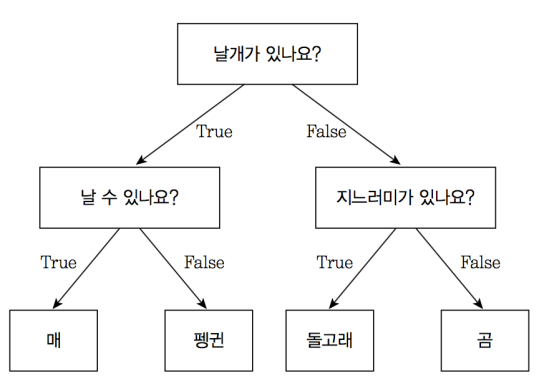

In [ ]:
# DecisionTree 적용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

RF = DecisionTreeClassifier()
RF.fit(x_train, y_train) # train data로 RF 훈련

pred = RF.predict(x_test) # test data로 RF를 이용하여 예측
print("Random forest를 이용한 정확률은", accuracy_score(y_test, pred))

## 실습

위에서와 마찬가지로 scikit-learn에서 제공해주는 machine learning model을 이용해 test의 분류 예측 해보기

랜덤 포레스트 Random Forest 여러 개의 decision tree가 분류한 결과에서 투표를 실시해 가장 많이 득표한 결과를 최종 분류 결과로 선택하는 앙상블 모델

이미지 출처: https://bioinformaticsandme.tistory.com/167

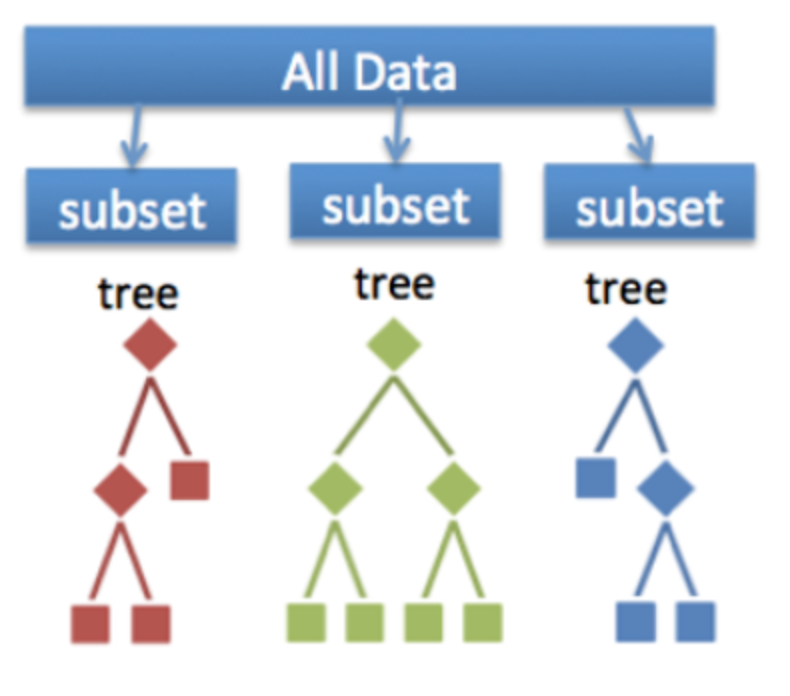

In [ ]:
# RandomForest 적용
from sklearn.ensemble import RandomForestClassifier



다층 퍼셉트론 MultiLayer Perceptron MLP 은닉층이 1개 이상 추가된 퍼셉트론

앞으로 배울 Feed Forward Neural Network의 가장 기본적인 형태

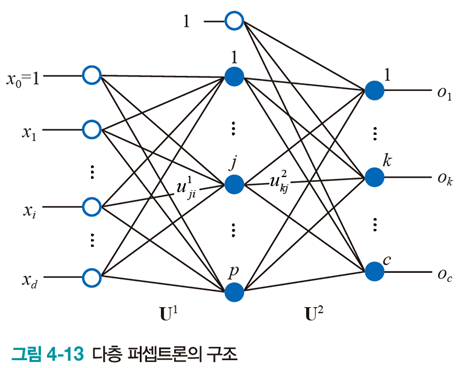

In [ ]:
# MLP 적용
from sklearn.neural_network import MLPClassifier

